## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPool2D,UpSampling2D,Input,BatchNormalization
from keras.datasets import mnist

## Loading data

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Plotting loaded data

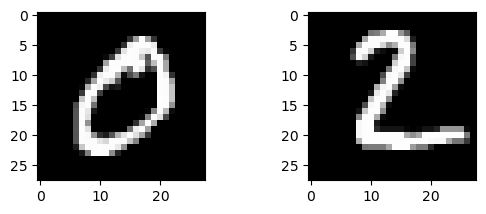

In [5]:
plt.subplot(2,2,1)
plt.imshow(x_train[1],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(x_test[1],cmap='gray')

## Normalization

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Adding noise to our data

In [8]:
noise_factor=0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)#loc=mean,scale=standard deviation
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

## Reshaping into one dimension

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train_noisy=x_train_noisy.reshape(x_train_noisy.shape[0],28,28,1)
x_test_noisy=x_test_noisy.reshape(x_test_noisy.shape[0],28,28,1)

### Encoder

In [16]:
#encoder part
encoder_in=Input(shape=x_train.shape[1:])
x=Conv2D(32,(3,3),activation='relu',padding = 'same')(encoder_in)
x=MaxPool2D(2,2)(x)
x=Conv2D(32,(3,3),activation='relu',padding = 'same')(x)
encoded=MaxPool2D(2,2)(x)

### Decoder

In [ ]:
#decoder part
x=Conv2D(32,(3,3),activation='relu',padding = 'same')(encoded)
x=UpSampling2D()(x)
x=Conv2D(32,(3,3),activation='relu',padding = 'same')(x)
x=UpSampling2D()(x)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding = 'same')(x)

## Model Building

In [18]:
autoencoder=Model(encoder_in,decoded)

In [19]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 32)          9248

In [20]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [21]:
autoencoder.fit(x_train_noisy,x_train,epochs=15,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 92s 54ms/step - loss: 0.0918 - val_loss: 0.0746
Epoch 2/15
1688/1688 [==============================] - 123s 73ms/step - loss: 0.0717 - val_loss: 0.0714
Epoch 3/15
1688/1688 [==============================] - 110s 65ms/step - loss: 0.0698 - val_loss: 0.0700
Epoch 4/15
1688/1688 [==============================] - 106s 63ms/step - loss: 0.0688 - val_loss: 0.0689
Epoch 5/15
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0681 - val_loss: 0.0685
Epoch 6/15
1688/1688 [==============================] - 113s 67ms/step - loss: 0.0677 - val_loss: 0.0682
Epoch 7/15
1688/1688 [==============================] - 168s 99ms/step - loss: 0.0674 - val_loss: 0.0678
Epoch 8/15
1688/1688 [==============================] - 141s 83ms/step - loss: 0.0672 - val_loss: 0.0677
Epoch 9/15
1688/1688 [==============================] - 171s 102ms/step - loss: 0.0670 - val_loss: 0.0675
Epoch 10/15
1688/1688 [==============================] 

In [22]:
pred=autoencoder.predict(x_test_noisy)
pred[:5]

313/313 [==============================] - 9s 28ms/step


array([[[[1.28382635e-06],
         [3.55460088e-07],
         [1.39615267e-07],
         ...,
         [5.00181523e-06],
         [1.05274376e-06],
         [5.93839786e-06]],

        [[4.26590674e-07],
         [1.14116023e-08],
         [1.00055642e-09],
         ...,
         [6.34882724e-08],
         [2.74341660e-09],
         [1.59852558e-08]],

        [[6.12127178e-06],
         [1.46130645e-07],
         [4.71342254e-09],
         ...,
         [2.32101314e-07],
         [4.38959002e-09],
         [2.15810303e-08]],

        ...,

        [[2.22518156e-06],
         [6.38159463e-08],
         [1.55470573e-07],
         ...,
         [8.51614914e-07],
         [4.09316563e-08],
         [2.06919083e-07]],

        [[1.12628095e-06],
         [1.24740955e-08],
         [5.71489558e-08],
         ...,
         [9.13807980e-07],
         [1.86529032e-08],
         [2.02639583e-07]],

        [[1.77711308e-06],
         [1.03617257e-08],
         [7.95267923e-08],
         ...,
 

### Prediction

In [25]:
pred_val=[np.argmax(i) for i in pred]
pred_val[:3]

[712, 513, 517]

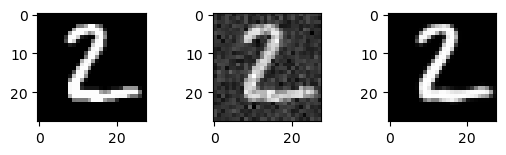

In [26]:
plt.subplot(3,3,1)
plt.imshow(x_test[1],cmap='gray')
plt.subplot(3,3,2)
plt.imshow(x_test_noisy[1],cmap='gray')
plt.subplot(3,3,3)
plt.imshow(pred[1],cmap='gray')